### Import neccesary packages

In [1]:
from shapely.geometry import Point, LineString
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

### Create the map for the i840 LineStrings

In [2]:
x = -86.78069                                                          # create the map on which all the points will be plotted
y = 36.14848
area_center = [y, x]
i840_map = folium.Map(location =  area_center, zoom_start = 10.0)

### Goal: plot counties which contain i840, main interstate in Middle Tn.

#### Those counties are:
                - Dickson
                - Williamson
                - Rutherford
                - Wilson

### Create Dickson County i840 LineStrings

In [3]:
dickson1 = pd.read_excel('../data/dickson2020.xlsx', skiprows = 11)                   # read in the excel file.
dickson1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
dickson = dickson1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]

In [4]:
i840dickson = dickson.loc[(dickson['Loc ID'] == '22000156') | (dickson['Loc ID'] == '22000073') | (dickson['Loc ID'] == '22000074')]
i840dickson = i840dickson.loc[[127,59,60]]
i840dickson

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date
127,22000156,Dickson,I0840,BETWEEN WILLIAMSON & I40,2-WAY,EB/WB,35.993063,-87.246734,13759,2020-01-01 00:00:00
59,22000073,Dickson,ABIFF RD.,W. OF SPENCERS MILL,2-WAY,EB/WB,35.985803,-87.241600,374,3/24/2021
60,22000074,Dickson,HICKMAN RD.,S. OF SPENCERS MILL,2-WAY,NaN,35.966442,-87.230323,873,3/24/2021


In [5]:
i840dickson['geometry'] = i840dickson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)

### Create Williamson County i840 LineStrings

In [6]:
williamson1 = pd.read_excel('../data/williamson2020.xlsx', skiprows = 11)                   # read in the excel file.
williamson1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
williamson = williamson1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]

In [7]:
williamson.loc[williamson['Loc ID'] == '75000280']

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date


In [8]:
i840williamson = williamson.loc[[230,235,33,246,236,0,227,11,17,1,226,225,88]]

In [9]:
i840williamson['geometry'] = i840williamson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)

### Create Rutherford County i840 LineString

In [10]:
rutherford1 = pd.read_excel('../data/rutherford2020.xlsx', skiprows = 11)
rutherford1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
rutherford = rutherford1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]

In [11]:
rutherford.loc[rutherford['Loc ID'] == '72']

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date
4,72,Rutherford,I0840,WILSON CO LINE,2-WAY,EB/WB,36.047657,-86.430127,25263,2021-04-07 00:00:00


In [12]:
i840rutherford = rutherford.loc[[285,70,72,284,104,106,304,99,37,257,75,77,256,255,254,4]]

In [13]:
i840rutherford['geometry'] = i840rutherford.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)

### Create Wilson County i840 LineString

In [14]:
wilson1 = pd.read_excel('../data/wilson2020.xlsx', skiprows = 11)
wilson1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
wilson = wilson1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]

In [15]:
wilson.loc[wilson['Loc ID'] == '95000014R']

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date
23,95000014R,Wilson,I0040,0235D,RAMP,NaN,36.184726,-86.350486,1309,2021-11-10 00:00:00


In [16]:
i840wilson = wilson.loc[[73,70,102,201,79,197,82,85,196,23]]

In [17]:
i840wilson['geometry'] = i840wilson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)

### Create concatenation of all linestrings

In [18]:
i840 = pd.concat([i840dickson,i840williamson,i840rutherford,i840wilson])

In [19]:
i840.dtypes

Loc ID          object
County          object
On              object
At              object
Dir             object
Directions      object
Latitude       float64
Longitude      float64
AADT             int64
Latest Date     object
geometry        object
dtype: object

In [20]:
i840['line_string'] = LineString(i840.geometry.tolist())

In [21]:
i840.reset_index(inplace = True)

In [22]:
i840

,index,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line_string
0,127,22000156,Dickson,I0840,BETWEEN WILLIAMSON & I40,2-WAY,EB/WB,35.993063,-87.246734,13759,2020-01-01 00:00:00,POINT (-87.246734 35.993063),"LINESTRING (-87.246734 35.993063, -87.24160000..."
1,59,22000073,Dickson,ABIFF RD.,W. OF SPENCERS MILL,2-WAY,EB/WB,35.985803,-87.241600,374,3/24/2021,POINT (-87.24160000000001 35.985803),"LINESTRING (-87.246734 35.993063, -87.24160000..."
2,60,22000074,Dickson,HICKMAN RD.,S. OF SPENCERS MILL,2-WAY,NaN,35.966442,-87.230323,873,3/24/2021,POINT (-87.230323 35.966442),"LINESTRING (-87.246734 35.993063, -87.24160000..."
3,230,94000204,Williamson,I-840,NaN,2-WAY,EB/WB,35.947649,-87.196897,16798,5/13/2021,POINT (-87.19689700000001 35.947649),"LINESTRING (-87.246734 35.993063, -87.24160000..."
4,235,94000211,Williamson,I-840,NaN,2-WAY,EB/WB,35.909309,-87.159769,21236,2020-01-01 00:00:00,POINT (-87.159769 35.909309),"LINESTRING (-87.246734 35.993063, -87.24160000..."
5,33,94000019,Williamson,BENDING CHESTNUT RD.,NEAR MAURY COUNTY LINE,2-WAY,NaN,35.869708,-87.083412,655,2021-11-05 00:00:00,POINT (-87.083412 35.869708),"LINESTRING (-87.246734 35.993063, -87.24160000..."
6,246,94000223,Williamson,I-840,NaN,2-WAY,EB/WB,35.816230,-87.024868,26997,5/13/2021,POINT (-87.024868 35.81623),"LINESTRING (-87.246734 35.993063, -87.24160000..."
7,236,94000212,Williamson,I-840,NaN,2-WAY,EB/WB,35.822085,-86.942476,19752,2020-01-01 00:00:00,POINT (-86.942476 35.822085),"LINESTRING (-87.246734 35.993063, -87.24160000..."
8,0,73,Williamson,I0840,WEST OF SR-106,2-WAY,EB/WB,35.821160,-86.866585,30377,2021-06-12 00:00:00,POINT (-86.866585 35.82116),"LINESTRING (-87.246734 35.993063, -87.24160000..."
9,227,94000201,Williamson,I-840,NaN,2-WAY,EB/WB,35.821337,-86.848189,48332,5/18/2021,POINT (-86.848189 35.821337),"LINESTRING (-87.246734 35.993063, -87.24160000..."


In [23]:
i840_line = i840.line_string[0]

In [24]:
folium.GeoJson(i840_line).add_to(i840_map)

In [25]:
i840_map

In [26]:
# i840.to_csv('i840.csv')

In [27]:
i840

,index,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line_string
0,127,22000156,Dickson,I0840,BETWEEN WILLIAMSON & I40,2-WAY,EB/WB,35.993063,-87.246734,13759,2020-01-01 00:00:00,POINT (-87.246734 35.993063),"LINESTRING (-87.246734 35.993063, -87.24160000..."
1,59,22000073,Dickson,ABIFF RD.,W. OF SPENCERS MILL,2-WAY,EB/WB,35.985803,-87.241600,374,3/24/2021,POINT (-87.24160000000001 35.985803),"LINESTRING (-87.246734 35.993063, -87.24160000..."
2,60,22000074,Dickson,HICKMAN RD.,S. OF SPENCERS MILL,2-WAY,NaN,35.966442,-87.230323,873,3/24/2021,POINT (-87.230323 35.966442),"LINESTRING (-87.246734 35.993063, -87.24160000..."
3,230,94000204,Williamson,I-840,NaN,2-WAY,EB/WB,35.947649,-87.196897,16798,5/13/2021,POINT (-87.19689700000001 35.947649),"LINESTRING (-87.246734 35.993063, -87.24160000..."
4,235,94000211,Williamson,I-840,NaN,2-WAY,EB/WB,35.909309,-87.159769,21236,2020-01-01 00:00:00,POINT (-87.159769 35.909309),"LINESTRING (-87.246734 35.993063, -87.24160000..."
5,33,94000019,Williamson,BENDING CHESTNUT RD.,NEAR MAURY COUNTY LINE,2-WAY,NaN,35.869708,-87.083412,655,2021-11-05 00:00:00,POINT (-87.083412 35.869708),"LINESTRING (-87.246734 35.993063, -87.24160000..."
6,246,94000223,Williamson,I-840,NaN,2-WAY,EB/WB,35.816230,-87.024868,26997,5/13/2021,POINT (-87.024868 35.81623),"LINESTRING (-87.246734 35.993063, -87.24160000..."
7,236,94000212,Williamson,I-840,NaN,2-WAY,EB/WB,35.822085,-86.942476,19752,2020-01-01 00:00:00,POINT (-86.942476 35.822085),"LINESTRING (-87.246734 35.993063, -87.24160000..."
8,0,73,Williamson,I0840,WEST OF SR-106,2-WAY,EB/WB,35.821160,-86.866585,30377,2021-06-12 00:00:00,POINT (-86.866585 35.82116),"LINESTRING (-87.246734 35.993063, -87.24160000..."
9,227,94000201,Williamson,I-840,NaN,2-WAY,EB/WB,35.821337,-86.848189,48332,5/18/2021,POINT (-86.848189 35.821337),"LINESTRING (-87.246734 35.993063, -87.24160000..."


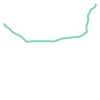

In [29]:
i840.line_string[0]